In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

C:\Users\Harsh Kapoor\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data PreProcessing

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

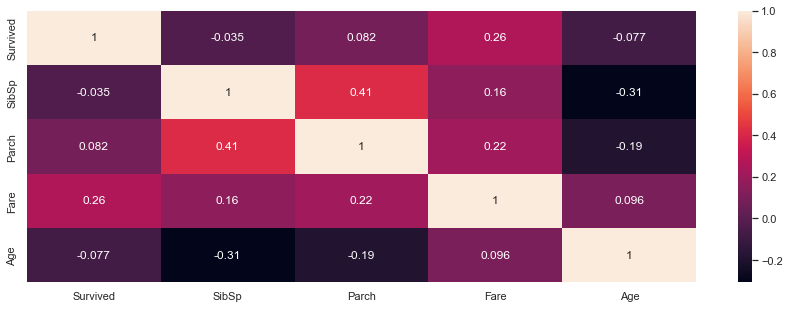

In [5]:
sns.set(rc = {'figure.figsize' : (15, 5)})
sns.heatmap(df[['Survived', 'SibSp', 'Parch', 'Fare', 'Age']].corr(), annot = True)

## <font color = 'red'>sibsp - Number Of Siblings  aboard in Titanic</font>

In [6]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

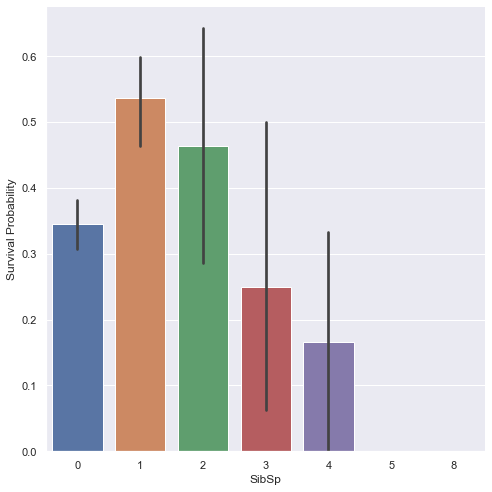

In [7]:
sns.set(rc = {'figure.figsize' : (15,5)})
sns.catplot(x = 'SibSp', y = 'Survived', data = df, kind = 'bar', size = 7).set_ylabels('Survival Probability')

## <font color = 'Brown'> Age</font>

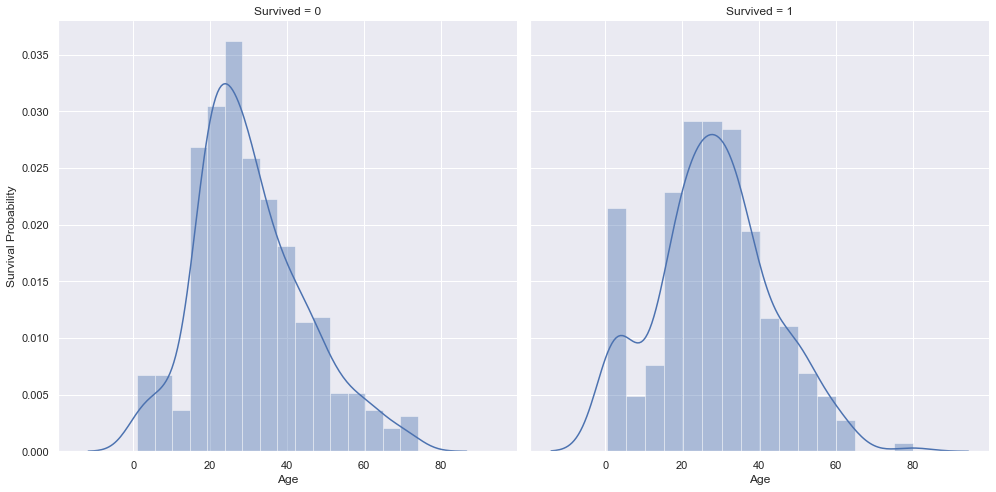

In [8]:
age_visual = sns.FacetGrid(df, col = 'Survived', height = 7)
age_visual = age_visual.map(sns.distplot, 'Age').set_ylabels('Survival Probability')

## <font color = 'Brown'> Sex</font>

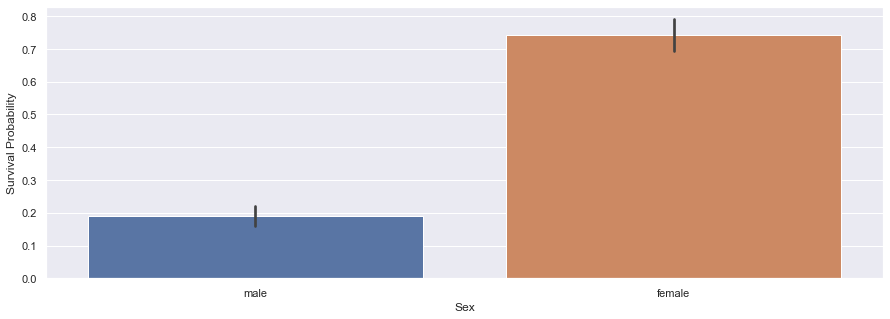

In [9]:
sns.barplot(x = df['Sex'], y = df['Survived']).set_ylabel('Survival Probability')
sns.set(rc = {'figure.figsize' : (10,7)})

In [10]:
df[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


## <font color = 'Brown'> PClass</font>

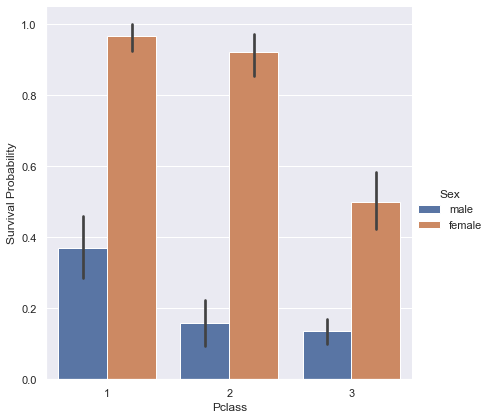

In [11]:
pclass = sns.catplot(x = 'Pclass', y = 'Survived', data = df, kind = 'bar', height = 6, hue = 'Sex')
pclass.set_ylabels('Survival Probability')

## Embarked

In [12]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [13]:
df['Embarked'].isnull().sum()

2

In [14]:
df['Embarked'] = df['Embarked'].fillna('S')

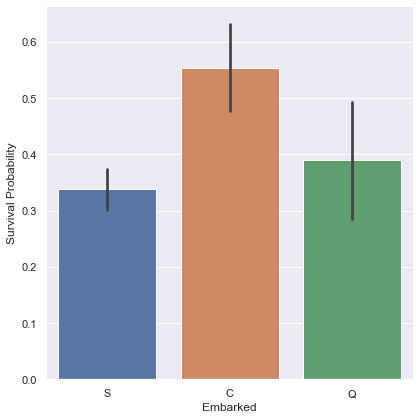

In [15]:
g = sns.catplot(x = 'Embarked', y = 'Survived', data = df, kind = 'bar', height = 6)
g.set_ylabels('Survival Probability')

## Preparing Data

In [16]:
mean = df['Age'].mean()
std = df['Age'].std()
is_null = df['Age'].isnull().sum()

In [17]:
print(mean, std, is_null)

29.69911764705882 14.526497332334044 177


In [18]:
rand_age = np.random.randint(mean-std, mean+std, size = is_null)
rand_age

array([31, 41, 39, 23, 32, 30, 28, 36, 16, 27, 18, 33, 17, 30, 20, 41, 19,
       37, 36, 28, 17, 24, 25, 28, 35, 16, 26, 25, 34, 33, 43, 20, 19, 29,
       15, 33, 41, 42, 30, 16, 31, 19, 33, 23, 33, 18, 16, 42, 29, 26, 41,
       39, 17, 24, 37, 28, 31, 37, 32, 17, 29, 36, 21, 21, 19, 15, 23, 32,
       31, 36, 17, 36, 30, 26, 40, 25, 28, 32, 26, 22, 41, 38, 22, 24, 15,
       19, 20, 16, 41, 32, 17, 43, 34, 41, 36, 42, 24, 43, 26, 30, 18, 28,
       38, 20, 42, 36, 28, 41, 34, 31, 32, 36, 43, 26, 22, 22, 18, 43, 42,
       34, 31, 17, 22, 24, 43, 42, 28, 31, 25, 41, 32, 29, 16, 32, 20, 42,
       24, 25, 19, 30, 34, 27, 21, 43, 26, 39, 29, 29, 23, 40, 15, 28, 22,
       23, 20, 42, 28, 42, 28, 33, 43, 40, 28, 27, 35, 34, 40, 37, 26, 23,
       43, 24, 26, 38, 29, 24, 28])

In [19]:
a = df['Age'].copy()
a[np.isnan(a)] = rand_age
df['Age'] = a

In [20]:
col_to_drop = ['PassengerId', 'Cabin', 'Ticket', 'Name']
df.drop(col_to_drop, axis = 1, inplace = True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [22]:
genders = {'male' : 0, 'female' : 1}
df['Sex'] = df['Sex'].map(genders)

In [23]:
ports = {'S':0, 'C':1 , 'Q':2 }
df['Embarked'] = df['Embarked'].map(ports)

## Splitting Data

In [24]:
x = df.drop(df.columns[0], axis = 1)
y = df['Survived']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### <font color = 'Red'>Scaling</font>

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)

## <font color = 'red'>Classification</font>

In [27]:
lr = LogisticRegression()
svc = SVC()
dct = DecisionTreeClassifier()
knn = KNeighborsClassifier(5)
rf = RandomForestClassifier(n_estimators=1000)

In [28]:
lr.fit(x_train, y_train)
svc.fit(x_train, y_train)
dct.fit(x_train, y_train)
knn.fit(x_train, y_train)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [29]:
lr_pred = lr.predict(x_test)
svc_pred = svc.predict(x_test)
dct_pred = dct.predict(x_test)
knn_pred = knn.predict(x_test)
rf_pred = rf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr_pred)
svc_acc = accuracy_score(y_test, svc_pred)
dct_acc = accuracy_score(y_test, dct_pred)
knn_acc = accuracy_score(y_test, knn_pred)
rf_acc = accuracy_score(y_test, rf_pred)

In [31]:
print('Logistic Regression :', round(lr_acc*100, 2))
print('Suppoer Vector      :', round(svc_acc*100, 2))
print('Decision Tree       :', round(dct_acc*100, 2))
print('K-NN Classifier     :', round(knn_acc*100, 2))
print('Random Forest       :', round(rf_acc*100, 2))

Logistic Regression : 80.97
Suppoer Vector      : 72.01
Decision Tree       : 76.87
K-NN Classifier     : 72.01
Random Forest       : 82.84
